<a href="https://colab.research.google.com/github/nishithewel/ID5059GroupProject/blob/yao_1/ID5059_p2_outlier%20removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load pandas, matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset & description

In [ ]:
#Load train_transaction.csv

trans_train = pd.read_csv('train_transaction.csv')
trans_train.shape

(590540, 394)

In [ ]:
trans_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


# Boxplot & delete outliers

In [ ]:
#Define a function called "plot_boxplot"

def plot_boxplot(df, feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

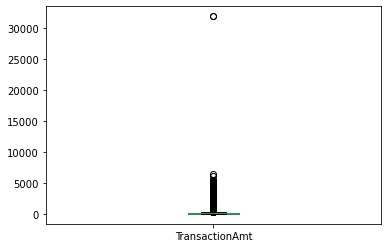

In [ ]:
#Identify outliers for "TransactionAmt"

plot_boxplot(trans_train, "TransactionAmt")

In [ ]:
#Create a function that returns a list of outliers

def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    
    ls = df.index[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
    
    return ls

In [ ]:
#Create an empty list to store the output indices from multiple columns

outlier_list = []
outlier_list.extend(outliers(trans_train,"TransactionAmt"))
len(outlier_list)

NameError: name 'trans_train' is not defined

In [ ]:
#Define a function to remove the outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
clean_trans_train = remove(trans_train, outlier_list)
clean_trans_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


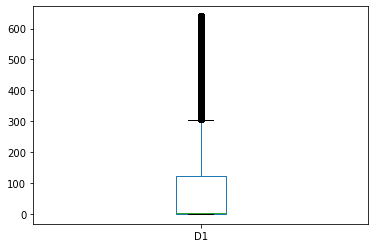

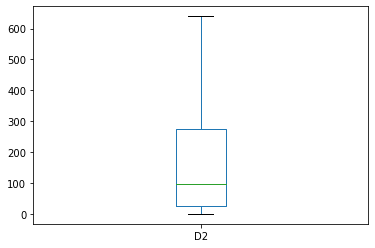

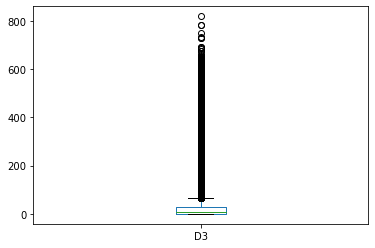

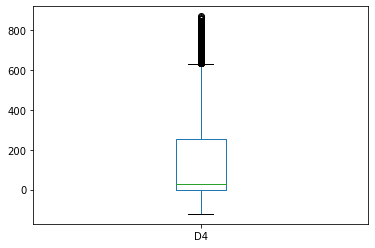

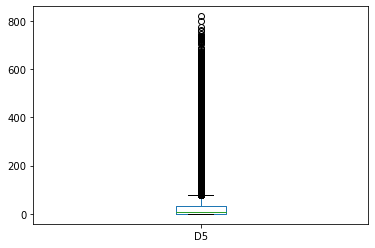

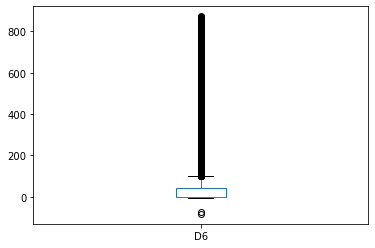

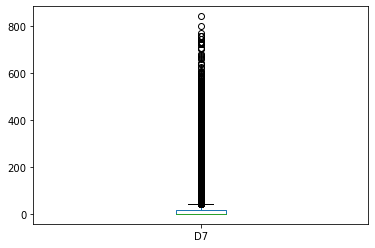

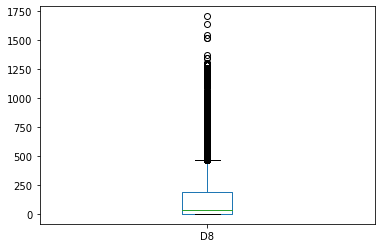

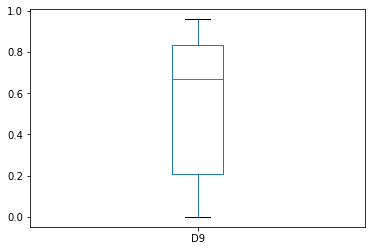

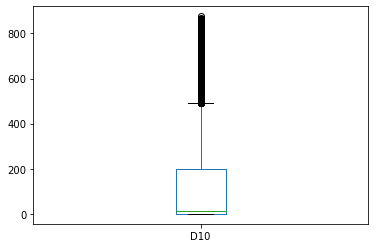

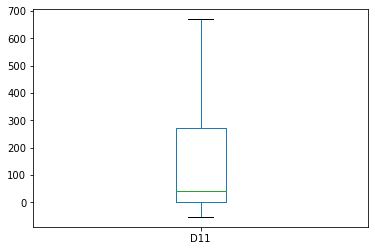

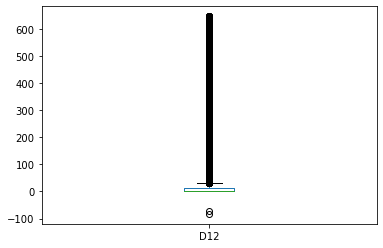

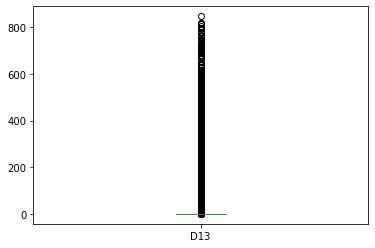

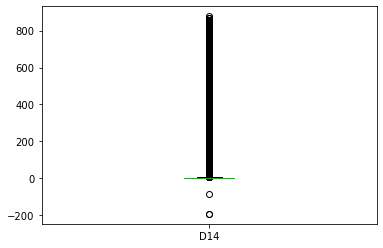

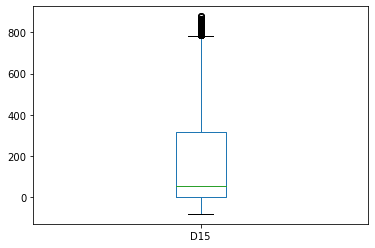

In [ ]:
#Identify outliers for days(column D1-D15. If the period between transactions are too long, we assume the person might stop using the card or not really using the card)

plot_boxplot(trans_train, "D1")
plot_boxplot(trans_train, "D2")
plot_boxplot(trans_train, "D3")
plot_boxplot(trans_train, "D4")
plot_boxplot(trans_train, "D5")
plot_boxplot(trans_train, "D6")
plot_boxplot(trans_train, "D7")
plot_boxplot(trans_train, "D8")
plot_boxplot(trans_train, "D9")
plot_boxplot(trans_train, "D10")
plot_boxplot(trans_train, "D11")
plot_boxplot(trans_train, "D12")
plot_boxplot(trans_train, "D13")
plot_boxplot(trans_train, "D14")
plot_boxplot(trans_train, "D15")

In [ ]:
#Delete day columns (D1-D15) since we assume in-between transaction period should not be too long

outlier_list_days = []
for feature in ["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12","D13","D14","D15"]:
    outlier_list_days.extend(outliers(clean_trans_train,feature))

clean_trans_train = remove(clean_trans_train, outlier_list_days)
clean_trans_train.shape

(182208, 394)

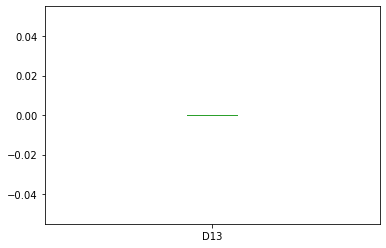

In [ ]:
plot_boxplot(clean_trans_train, "D13")